In [1]:
# Essential libraries: 
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.express as px
# import calmap
# import folium
%matplotlib inline


# hide warnings
import warnings
warnings.filterwarnings('ignore')

My aim with this analysis was to show the impact of Coronavirus's spread on a number of popular investment categories (company stocks/commodity futures/cryptocurrency).

In [2]:
# We import the dataset
LNC_raw = pd.read_csv('LNC Historical Data.csv')
# We remove the columns that we don't need
LNC = LNC_raw.drop(['High', 'Low', 'Vol.', 'Price', 'Open'], axis=1)
# We change the name for when we do a Merge know what price is it. 
LNC.rename(columns={'Change %': 'Price_LNC'}, inplace=True)
LNC

Date Price_LNC
0   Apr 09, 2020     5.31%
1   Apr 08, 2020    10.67%
2   Apr 07, 2020     9.00%
3   Apr 06, 2020    15.05%
4   Apr 03, 2020    -0.30%
..           ...       ...
85  Dec 06, 2019     1.78%
86  Dec 05, 2019     0.21%
87  Dec 04, 2019     0.87%
88  Dec 03, 2019    -4.15%
89  Dec 02, 2019    -0.80%

[90 rows x 2 columns]

In [3]:
MOS_raw = pd.read_csv('MOS Historical Data.csv')
MOS = MOS_raw.drop(['High', 'Low', 'Vol.', 'Price', 'Open'], axis=1)
MOS.rename(columns={'Change %': 'Price_MOS'}, inplace=True)
MOS

Date Price_MOS
0   Apr 09, 2020     9.92%
1   Apr 08, 2020     1.11%
2   Apr 07, 2020     3.00%
3   Apr 06, 2020    13.98%
4   Apr 03, 2020     1.22%
..           ...       ...
85  Dec 06, 2019     2.86%
86  Dec 05, 2019     0.98%
87  Dec 04, 2019    -0.33%
88  Dec 03, 2019    -2.95%
89  Dec 02, 2019    -0.31%

[90 rows x 2 columns]

In [4]:
NBL_raw = pd.read_csv('NBL Historical Data.csv')
NBL = NBL_raw.drop(['High', 'Low', 'Vol.', 'Price', 'Open'], axis=1)
NBL.rename(columns={'Change %': 'Price_NBL'}, inplace=True)
NBL

Date Price_NBL
0   Apr 09, 2020     4.02%
1   Apr 08, 2020     6.49%
2   Apr 07, 2020     1.65%
3   Apr 06, 2020     7.93%
4   Apr 03, 2020    -2.06%
..           ...       ...
85  Dec 06, 2019     4.19%
86  Dec 05, 2019     0.33%
87  Dec 04, 2019     3.82%
88  Dec 03, 2019    -2.14%
89  Dec 02, 2019    -0.87%

[90 rows x 2 columns]

In [5]:
NCLH_raw = pd.read_csv('NCLH Historical Data.csv')
NCLH = NCLH_raw.drop(['High', 'Low', 'Vol.', 'Price', 'Open'], axis=1)
NCLH.rename(columns={'Change %': 'Price_NCLH'}, inplace=True)
NCLH

Date Price_NCLH
0   Apr 09, 2020     11.86%
1   Apr 08, 2020      6.45%
2   Apr 07, 2020      9.99%
3   Apr 06, 2020     18.32%
4   Apr 03, 2020      0.71%
..           ...        ...
85  Dec 06, 2019      0.85%
86  Dec 05, 2019      1.19%
87  Dec 04, 2019      1.42%
88  Dec 03, 2019     -0.55%
89  Dec 02, 2019     -0.91%

[90 rows x 2 columns]

In [6]:
UAL_raw = pd.read_csv('UAL Historical Data.csv')
UAL = UAL_raw.drop(['High', 'Low', 'Vol.', 'Price', 'Open'], axis=1)
UAL.rename(columns={'Change %': 'Price_UAL'}, inplace=True)
UAL

Date Price_UAL
0   Apr 09, 2020    14.50%
1   Apr 08, 2020    12.38%
2   Apr 07, 2020     1.92%
3   Apr 06, 2020     4.94%
4   Apr 03, 2020    -2.26%
..           ...       ...
85  Dec 06, 2019     0.82%
86  Dec 05, 2019    -0.35%
87  Dec 04, 2019    -0.79%
88  Dec 03, 2019    -3.01%
89  Dec 02, 2019    -1.26%

[90 rows x 2 columns]

In [7]:
Cov_raw = pd.read_csv('covid_19_data.csv')
Cov = Cov_raw.drop(['Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Recovered', 'SNo'], axis=1)
Cov.rename(columns={'ObservationDate': 'Date'}, inplace=True)
Cov.rename(columns={'Deaths': 'Deaths_cov'}, inplace=True)
print(Cov.Date.value_counts())

04/10/2020    321
04/06/2020    320
04/09/2020    320
04/08/2020    320
04/07/2020    320
             ... 
01/26/2020     47
01/23/2020     46
01/25/2020     44
01/24/2020     41
01/22/2020     38
Name: Date, Length: 80, dtype: int64


In [8]:
Cov.drop_duplicates()
print(Cov.Date.value_counts())

04/10/2020    321
04/06/2020    320
04/09/2020    320
04/08/2020    320
04/07/2020    320
             ... 
01/26/2020     47
01/23/2020     46
01/25/2020     44
01/24/2020     41
01/22/2020     38
Name: Date, Length: 80, dtype: int64


In [9]:
Cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13850 entries, 0 to 13849
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        13850 non-null  object 
 1   Deaths_cov  13850 non-null  float64
dtypes: float64(1), object(1)
memory usage: 216.5+ KB


In [10]:
Cov['Cumm_sum'] = Cov['Deaths_cov'].cumsum()
Cov

Date  Deaths_cov   Cumm_sum
0      01/22/2020         0.0        0.0
1      01/22/2020         0.0        0.0
2      01/22/2020         0.0        0.0
3      01/22/2020         0.0        0.0
4      01/22/2020         0.0        0.0
...           ...         ...        ...
13845  04/10/2020         0.0  1169261.0
13846  04/10/2020         3.0  1169264.0
13847  04/10/2020         0.0  1169264.0
13848  04/10/2020         2.0  1169266.0
13849  04/10/2020         1.0  1169267.0

[13850 rows x 3 columns]

In [11]:
Cov.describe()

Deaths_cov      Cumm_sum
count  13850.000000  1.385000e+04
mean      84.423610  2.747057e+05
std      749.836337  3.003996e+05
min        0.000000  0.000000e+00
25%        0.000000  6.362700e+04
50%        0.000000  1.433320e+05
75%        4.000000  3.930540e+05
max    18849.000000  1.169267e+06

In [12]:
Cov['Cumm_sum'] = Cov['Cumm_sum']/1000
Cov.head()

Date  Deaths_cov  Cumm_sum
0  01/22/2020         0.0       0.0
1  01/22/2020         0.0       0.0
2  01/22/2020         0.0       0.0
3  01/22/2020         0.0       0.0
4  01/22/2020         0.0       0.0

In [13]:
Stocks_0 = pd.merge(LNC,MOS,on='Date')
Stocks_0

Date Price_LNC Price_MOS
0   Apr 09, 2020     5.31%     9.92%
1   Apr 08, 2020    10.67%     1.11%
2   Apr 07, 2020     9.00%     3.00%
3   Apr 06, 2020    15.05%    13.98%
4   Apr 03, 2020    -0.30%     1.22%
..           ...       ...       ...
85  Dec 06, 2019     1.78%     2.86%
86  Dec 05, 2019     0.21%     0.98%
87  Dec 04, 2019     0.87%    -0.33%
88  Dec 03, 2019    -4.15%    -2.95%
89  Dec 02, 2019    -0.80%    -0.31%

[90 rows x 3 columns]

In [14]:
Stocks_1 = pd.merge(Stocks_0,NBL,on='Date')
Stocks_1.head()

Date Price_LNC Price_MOS Price_NBL
0  Apr 09, 2020     5.31%     9.92%     4.02%
1  Apr 08, 2020    10.67%     1.11%     6.49%
2  Apr 07, 2020     9.00%     3.00%     1.65%
3  Apr 06, 2020    15.05%    13.98%     7.93%
4  Apr 03, 2020    -0.30%     1.22%    -2.06%

In [15]:
Stocks_2 = pd.merge(Stocks_1,NCLH,on='Date')
Stocks_2.head()

Date Price_LNC Price_MOS Price_NBL Price_NCLH
0  Apr 09, 2020     5.31%     9.92%     4.02%     11.86%
1  Apr 08, 2020    10.67%     1.11%     6.49%      6.45%
2  Apr 07, 2020     9.00%     3.00%     1.65%      9.99%
3  Apr 06, 2020    15.05%    13.98%     7.93%     18.32%
4  Apr 03, 2020    -0.30%     1.22%    -2.06%      0.71%

In [16]:
Stocks_3 = pd.merge(Stocks_2,UAL,on='Date')
Stocks_3.head()

Date Price_LNC Price_MOS Price_NBL Price_NCLH Price_UAL
0  Apr 09, 2020     5.31%     9.92%     4.02%     11.86%    14.50%
1  Apr 08, 2020    10.67%     1.11%     6.49%      6.45%    12.38%
2  Apr 07, 2020     9.00%     3.00%     1.65%      9.99%     1.92%
3  Apr 06, 2020    15.05%    13.98%     7.93%     18.32%     4.94%
4  Apr 03, 2020    -0.30%     1.22%    -2.06%      0.71%    -2.26%

## Time Series

In [17]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
# from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
#from fbprophet import Prophet

from math import sqrt

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns

from random import random

from datetime import datetime

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

Converting to datetime format: 

In [18]:
Stocks_3.Date = pd.to_datetime(Stocks_3.Date).dt.strftime('%Y-%m-%d')
Stocks_3

Date Price_LNC Price_MOS Price_NBL Price_NCLH Price_UAL
0   2020-04-09     5.31%     9.92%     4.02%     11.86%    14.50%
1   2020-04-08    10.67%     1.11%     6.49%      6.45%    12.38%
2   2020-04-07     9.00%     3.00%     1.65%      9.99%     1.92%
3   2020-04-06    15.05%    13.98%     7.93%     18.32%     4.94%
4   2020-04-03    -0.30%     1.22%    -2.06%      0.71%    -2.26%
..         ...       ...       ...       ...        ...       ...
85  2019-12-06     1.78%     2.86%     4.19%      0.85%     0.82%
86  2019-12-05     0.21%     0.98%     0.33%      1.19%    -0.35%
87  2019-12-04     0.87%    -0.33%     3.82%      1.42%    -0.79%
88  2019-12-03    -4.15%    -2.95%    -2.14%     -0.55%    -3.01%
89  2019-12-02    -0.80%    -0.31%    -0.87%     -0.91%    -1.26%

[90 rows x 6 columns]

In [19]:
Cov.Date = pd.to_datetime(Cov.Date).dt.strftime('%Y-%m-%d')
Cov.head()

Date  Deaths_cov  Cumm_sum
0  2020-01-22         0.0       0.0
1  2020-01-22         0.0       0.0
2  2020-01-22         0.0       0.0
3  2020-01-22         0.0       0.0
4  2020-01-22         0.0       0.0

In [20]:
Stocks = pd.merge(Stocks_3,
                 Cov,
                 on='Date', 
                 how='left')
Stocks

Date Price_LNC Price_MOS Price_NBL Price_NCLH Price_UAL  Deaths_cov  Cumm_sum
0     2020-04-09     5.31%     9.92%     4.02%     11.86%    14.50%        15.0   971.302
1     2020-04-09     5.31%     9.92%     4.02%     11.86%    14.50%        23.0   971.325
2     2020-04-09     5.31%     9.92%     4.02%     11.86%    14.50%       235.0   971.560
3     2020-04-09     5.31%     9.92%     4.02%     11.86%    14.50%        25.0   971.585
4     2020-04-09     5.31%     9.92%     4.02%     11.86%    14.50%         2.0   971.587
...          ...       ...       ...       ...        ...       ...         ...       ...
9705  2019-12-06     1.78%     2.86%     4.19%      0.85%     0.82%         NaN       NaN
9706  2019-12-05     0.21%     0.98%     0.33%      1.19%    -0.35%         NaN       NaN
9707  2019-12-04     0.87%    -0.33%     3.82%      1.42%    -0.79%         NaN       NaN
9708  2019-12-03    -4.15%    -2.95%    -2.14%     -0.55%    -3.01%         NaN       NaN
9709  2019-12-02    -0.80%    -0.31%    -0.87%     -0.91%    -1.26%         NaN       NaN

[9710 rows x 8 columns]

In [21]:
Stocks = Stocks.drop(['Deaths_cov'], axis=1)

In [22]:
Stocks["Cumm_sum"] = Stocks["Cumm_sum"].fillna(0)

In [23]:
Stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9710 entries, 0 to 9709
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        9710 non-null   object 
 1   Price_LNC   9710 non-null   object 
 2   Price_MOS   9710 non-null   object 
 3   Price_NBL   9710 non-null   object 
 4   Price_NCLH  9710 non-null   object 
 5   Price_UAL   9710 non-null   object 
 6   Cumm_sum    9710 non-null   float64
dtypes: float64(1), object(6)
memory usage: 606.9+ KB


In [24]:
Stocks.rename(columns={'Cumm_sum': 'COVID-19_cumm_d'}, inplace=True)

In [25]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure()
fig.add_trace(go.Scatter(
                x=Stocks['Date'],
                y=Stocks['Price_LNC'],
                name="Price_LNC",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=Stocks['Date'],
                y=Stocks['Price_MOS'],
                name="Price_MOS",
                line_color='orange',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=Stocks['Date'],
                y=Stocks['Price_NBL'],
                name="Price_NBL",
                line_color='darkblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=Stocks['Date'],
                y=Stocks['Price_NCLH'],
                name="Price_NCLH",
                line_color='hotpink',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=Stocks['Date'],
                y=Stocks['Price_UAL'],
                name="Price_UAL",
                line_color='green',
                opacity=0.8))

fig.show()

In [35]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=Stocks['Date'],y=Stocks['Price_LNC'],
               name="Price_LNC",line_color='salmon',
               opacity=0.8),
    secondary_y=False,
)


fig.add_trace(
    go.Scatter(x=Stocks['Date'],y=Stocks['Price_MOS'],
                name="Price_MOS",
                line_color='orange',
               opacity=0.8),
    secondary_y=False,
)


fig.add_trace(
    go.Scatter(x=Stocks['Date'],y=Stocks['Price_NBL'],
                name="Price_NBL",
                line_color='yellowgreen',
               opacity=0.8),
    secondary_y=False,
)


fig.add_trace(
    go.Scatter(x=Stocks['Date'], y=Stocks['Price_NCLH'],
                name="Price_NCLH",
                line_color='deeppink',
               opacity=0.8),
    secondary_y=False,
)

fig.add_trace(go.Scatter(
                x=Stocks['Date'],
                y=Stocks['Price_UAL'],
                name="Price_UAL",
                line_color='darkturquoise',
                opacity=0.8))


fig.add_trace(
    go.Scatter(x=Stocks['Date'],
                y=Stocks['COVID-19_cumm_d'], name= 'COVID_CummDeaths',
              line_color='blueviolet',),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Coronavirus And Its Impact On Major Investment Options (March 2020)"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Stocks</b> percentage change", secondary_y=False)
fig.update_yaxes(title_text="<b>Coronavirus</b>", secondary_y=True)

fig.show()

Sources: 
- Delta: https://www.investing.com/equities/delta-air-lines-new-historical-data
- McDonalds: https://www.investing.com/equities/mcdonalds-historical-data
- Oil: https://www.investing.com/commodities/crude-oil-historical-data
- Bitcoin: https://www.investing.com/crypto/bitcoin/btc-usd-historical-data

-------------------------------------------------------- ANNEX-------------------------------------------------------

In [27]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure()
fig.add_trace(go.Scatter(
                x=Stocks['Date'],
                y=Stocks['Price_Mcdonalds'],
                name="Price_Mcdonalds",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=Stocks['Date'],
                y=Stocks['Price_Oil'],
                name="Price_Oil",
                line_color='orange',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=Stocks['Date'],
                y=Stocks['Price_Gold'],
                name="Price_Gold",
                line_color='darkblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=Stocks['Date'],
                y=Stocks['Price_Bitcoin'],
                name="Price_Bitcoin",
                line_color='hotpink',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=Stocks['Date'],
                y=Stocks['Price_Delta'],
                name="Price_Delta",
                line_color='green',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=Stocks['Date'],
                y=Stocks['Cumm_sum'],
                name="Cumm_sum",
                line_color='yellow',
                opacity=0.8))


fig.show()

KeyError: 'Price_Mcdonalds'

Setting index as the datetime column for easier manipulations:

In [ ]:
y = Stocks.set_index('Date')

In [ ]:
y.index

In [ ]:
y.isnull().sum()

In [ ]:
# perque només surten 3? 
# les dates no surten amb ordre! 
y.plot(figsize=(15, 6))
plt.show()

In [28]:
Stocks.head()

Date Price_LNC Price_MOS Price_NBL Price_NCLH Price_UAL  COVID-19_cumm_d
0  2020-04-09     5.31%     9.92%     4.02%     11.86%    14.50%          971.302
1  2020-04-09     5.31%     9.92%     4.02%     11.86%    14.50%          971.325
2  2020-04-09     5.31%     9.92%     4.02%     11.86%    14.50%          971.560
3  2020-04-09     5.31%     9.92%     4.02%     11.86%    14.50%          971.585
4  2020-04-09     5.31%     9.92%     4.02%     11.86%    14.50%          971.587

In [29]:
x = Stocks['Date']
y1 = Stocks['Price_Mcdonalds']
y2 = Stocks['Deaths_cov']

KeyError: 'Price_Mcdonalds'

NameError: name 'y1' is not defined

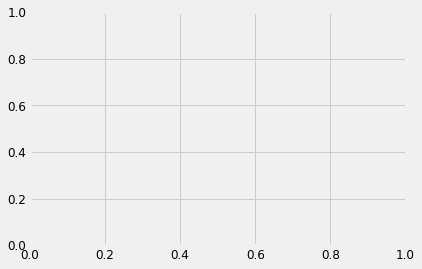

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('y1')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-')
ax2.set_ylabel('y2', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')